In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [68]:
data = pd.read_csv('stocks.csv')
data.head()

,Date,DFNS-UN,060720.KQ,CYAD.BR,IF7.F,0BQ.F,MARP.MI,BONY.VI,S5L.F,FOR,...,ROIC,G6O.F,FZM.F,WE1.F,FX9.SG,W2R.SG,FS7.BE,DDAIF,PKX,KNRCON.NS
0,2013-07-04 00:00:00,NaN,NaN,16.650000,1.927665,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433383,14.746752,1.690802,1.762427,0.009238,NaN,NaN,6.391537
1,2013-07-05 00:00:00,NaN,NaN,18.889999,1.977143,NaN,NaN,NaN,NaN,20.389999,...,10.013093,NaN,0.414587,14.974738,1.787772,1.762427,0.008969,42.503864,48.942223,6.892158
2,2013-07-08 00:00:00,NaN,NaN,20.160000,2.036516,NaN,NaN,NaN,NaN,20.650000,...,10.028006,NaN,0.411395,15.291347,1.667882,1.762427,0.009003,43.027748,49.467495,6.559849
3,2013-07-09 00:00:00,NaN,NaN,19.250000,2.048391,NaN,NaN,NaN,NaN,21.080000,...,10.154752,NaN,0.398982,15.150365,1.734879,1.977226,0.008969,43.255238,50.152641,6.801528
4,2013-07-10 00:00:00,NaN,NaN,18.790001,2.153284,NaN,NaN,NaN,NaN,21.430000,...,10.274045,NaN,0.407139,15.388825,1.725182,1.858592,0.009171,43.420670,50.084118,6.801528


In [69]:
data = data.sort_values('Date')
data['Date'] = data['Date'].apply(lambda x: x.split(' ')[0])
data = data[data['Date'] <= '2021-05-13']

In [70]:
data.head()

,Date,DFNS-UN,060720.KQ,CYAD.BR,IF7.F,0BQ.F,MARP.MI,BONY.VI,S5L.F,FOR,...,ROIC,G6O.F,FZM.F,WE1.F,FX9.SG,W2R.SG,FS7.BE,DDAIF,PKX,KNRCON.NS
15297,1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15298,1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15299,1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15300,1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15301,1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
data = data.set_index('Date')

In [72]:
data.tail()

,DFNS-UN,060720.KQ,CYAD.BR,IF7.F,0BQ.F,MARP.MI,BONY.VI,S5L.F,FOR,LFAP,...,ROIC,G6O.F,FZM.F,WE1.F,FX9.SG,W2R.SG,FS7.BE,DDAIF,PKX,KNRCON.NS
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-10,NaN,NaN,4.805,0.114,3.525,3.58,42.364643,2.685,25.000000,0.0450,...,17.623484,12.773351,1.853894,39.128689,1.5925,0.51,0.184364,88.750000,90.790001,204.075256
2021-05-11,NaN,NaN,4.640,0.111,3.395,3.62,41.659710,2.640,23.500000,0.0275,...,17.434626,11.882187,1.808677,39.721546,1.6440,0.51,0.184364,87.889999,91.779999,204.424957
2021-05-12,NaN,NaN,4.590,0.112,3.395,3.64,42.021969,2.500,22.469999,0.0340,...,16.927691,11.882187,1.826764,38.733448,1.6260,0.51,0.184364,87.580002,85.629997,212.368149
2021-05-13,NaN,NaN,4.860,0.111,3.360,3.60,41.875103,2.320,22.990000,0.0355,...,17.275585,12.179242,1.802347,38.535831,1.5325,0.51,0.184364,87.650002,86.110001,NaN


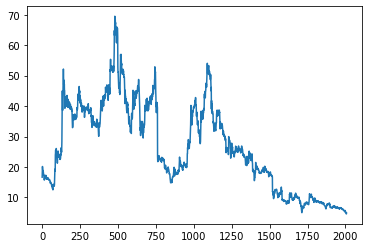

In [55]:
ticker = 'CYAD.BR'
dates = np.array(data[ticker].index)
ar = np.array(data[ticker])
idx_notna = np.where(~np.isnan(ar))[0]
ar = ar[idx_notna]
dates = dates[idx_notna]
plt.plot(ar)

In [65]:
from scipy.signal import argrelextrema

maxx = argrelextrema(ar, np.greater, order=300)[0]
minn = argrelextrema(ar, np.less, order=300)[0]
extrs = np.append(maxx, minn)
extrs = np.sort(extrs)
tss = []
for i in range(len(extrs)):
    if i == 0:
        prev = 0
    else:
        prev = extrs[i - 1]
    ts = list(ar[prev:extrs[i] + 1][::-1])
    ts = [ticker, extrs[i], dates[extrs[i]]] + ts
    tss.append(ts)

In [66]:
pd.DataFrame(tss)

,0,1,2,3,4,5,6,7,8,9,...,911,912,913,914,915,916,917,918,919,920
0,CYAD.BR,71,2013-10-11,12.500000,12.730000,12.890000,12.970000,13.030000,13.150000,13.850000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CYAD.BR,140,2014-01-21,52.160000,49.900002,45.189999,42.500000,41.480000,38.599998,41.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CYAD.BR,479,2015-05-22,69.500000,63.930000,63.209999,64.790001,57.849998,55.099998,53.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CYAD.BR,847,2016-10-26,14.820000,15.060000,15.755000,16.084999,16.500000,17.450001,17.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CYAD.BR,1089,2017-10-05,54.049999,52.000000,51.950001,49.924999,47.880001,46.224998,47.310001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CYAD.BR,2006,2021-05-12,4.590000,4.640000,4.805000,4.845000,5.120000,5.300000,5.170000,...,53.299999,52.84,52.599998,50.889999,50.82,50.720001,50.849998,50.720001,51.849998,54.049999


In [73]:
tss = []

for ticker in tqdm(data.columns):
    dates = np.array(data[ticker].index)
    ar = np.array(data[ticker])
    idx_notna = np.where(~np.isnan(ar))[0]
    ar = ar[idx_notna]
    if len(ar) < 366:
        continue
    dates = dates[idx_notna]
    maxx = argrelextrema(ar, np.greater, order=300)[0]
    minn = argrelextrema(ar, np.less, order=300)[0]
    extrs = np.append(maxx, minn)
    extrs = np.sort(extrs)
    for i in range(len(extrs)):
        if i == 0:
            prev = 0
        else:
            prev = extrs[i - 1]
        ts = list(ar[prev:extrs[i] + 1][::-1])
        ts = [ticker, extrs[i], dates[extrs[i]]] + ts
        tss.append(ts)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [75]:
data = pd.read_csv('stocks1.csv')
data = data.sort_values('Date')
data['Date'] = data['Date'].apply(lambda x: x.split(' ')[0])
data = data[data['Date'] <= '2021-05-13']
data = data.set_index('Date')
for ticker in tqdm(data.columns):
    dates = np.array(data[ticker].index)
    ar = np.array(data[ticker])
    idx_notna = np.where(~np.isnan(ar))[0]
    ar = ar[idx_notna]
    if len(ar) < 366:
        continue
    dates = dates[idx_notna]
    maxx = argrelextrema(ar, np.greater, order=300)[0]
    minn = argrelextrema(ar, np.less, order=300)[0]
    extrs = np.append(maxx, minn)
    extrs = np.sort(extrs)
    for i in range(len(extrs)):
        if i == 0:
            prev = 0
        else:
            prev = extrs[i - 1]
        ts = list(ar[prev:extrs[i] + 1][::-1])
        ts = [ticker, extrs[i], dates[extrs[i]]] + ts
        tss.append(ts)

  0%|          | 0/14839 [00:00<?, ?it/s]

In [77]:
data = pd.DataFrame(tss)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,7307,7308,7309,7310,7311,7312,7313,7314,7315,7316
0,CYAD.BR,71,2013-10-11,12.500000,12.730000,12.890000,12.970000,13.030000,13.150000,13.850000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CYAD.BR,140,2014-01-21,52.160000,49.900002,45.189999,42.500000,41.480000,38.599998,41.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CYAD.BR,479,2015-05-22,69.500000,63.930000,63.209999,64.790001,57.849998,55.099998,53.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CYAD.BR,847,2016-10-26,14.820000,15.060000,15.755000,16.084999,16.500000,17.450001,17.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CYAD.BR,1089,2017-10-05,54.049999,52.000000,51.950001,49.924999,47.880001,46.224998,47.310001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
data = data.iloc[:, :1256]

In [92]:
data.columns = ['Ticker', 'index', 'Date', 'extremum'] + [f'-{x + 1}' for x in range(len(data.columns[4:]))]

In [94]:
data = data.set_index('Ticker')
data.head()

,index,Date,extremum,-1,-2,-3,-4,-5,-6,-7,...,-1243,-1244,-1245,-1246,-1247,-1248,-1249,-1250,-1251,-1252
Ticker,,,,,,,,,,,,,,,,,,,,,
CYAD.BR,71,2013-10-11,12.500000,12.730000,12.890000,12.970000,13.030000,13.150000,13.850000,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CYAD.BR,140,2014-01-21,52.160000,49.900002,45.189999,42.500000,41.480000,38.599998,41.000000,45.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CYAD.BR,479,2015-05-22,69.500000,63.930000,63.209999,64.790001,57.849998,55.099998,53.000000,51.400002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CYAD.BR,847,2016-10-26,14.820000,15.060000,15.755000,16.084999,16.500000,17.450001,17.500000,17.850000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CYAD.BR,1089,2017-10-05,54.049999,52.000000,51.950001,49.924999,47.880001,46.224998,47.310001,46.759998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
data[data['Date'] >= '2020-02-20'].to_csv('test_stocks.csv')
data[data['Date'] < '2020-02-20'].to_csv('train_stocks.csv')